## Text Classification for Generated Numeric Data
### Uses XGBoost Binary Classifier
#### Steps:
1. Load Data
2. Split Data
3. Fit XGB Classifier
4. Evaluate Model Performance
5. Log Model Outcome

In [3]:
from sklearn.datasets import make_classification
data = make_classification(n_samples=50000,n_features=100, n_informative=90,n_redundant=10)

#### Split Data

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=.2)

#### Fit XGB Classifier

In [5]:
from xgboost import XGBClassifier

# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=5, learning_rate=1, objective='binary:logistic')

# fit model
bst.fit(X_train, y_train)

/Users/fox/opt/anaconda3/envs/tc3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:30:39] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Compute Model Performance

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
# make predictions for test data
y_pred = bst.predict(X_test)
y_prob = [x[1] for x in bst.predict_proba(X_test)]
# evaluate predictions
def get_sklearn_metrics(y_test, predictions, probabilities):
    mp = {}
    mp['accuracy'] = accuracy_score(y_test, predictions)
    mp['f1'] = f1_score(y_test, predictions)
    mp['precision'] = precision_score(y_test, predictions)
    mp['recall'] = recall_score(y_test, predictions)
    mp['roc_auc'] = roc_auc_score(y_test, probabilities)
    print(mp)
    return mp
model_performance = get_sklearn_metrics(y_test, y_pred, y_prob)

{'accuracy': 0.7124, 'f1': 0.7178732587796743, 'precision': 0.7056894889103182, 'recall': 0.7304851267718108, 'roc_auc': 0.7912224035605876}


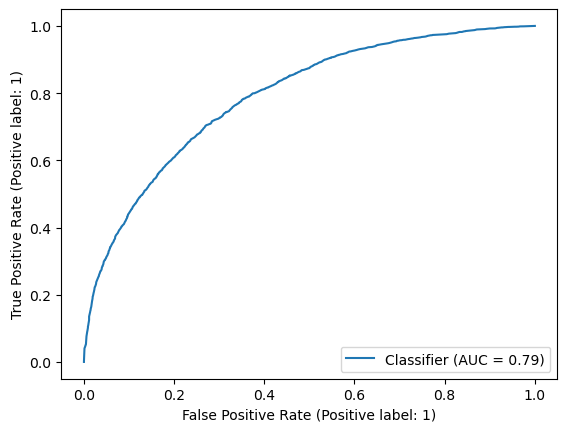

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_prob)

plt.show()

### Log Model Outcome

In [ ]:
from datetime import datetime
def log_model(model, user: str, model_type: str, data_transform: str, model_params: dict, model_perf: dict, y_test_prob, y_test_pred):
    # Save model file
    if type(model) == 'xgboost.sklearn.XGBClassifier':
        model.save_model(f'{model_type}__{user}_{str(datetime.now())}.json')
        
    # Create model dictionary
    model_record = {'model_type':model_type, 'data_transform':data_transform, 'model_params':model_params, 'model_perf':model_perf}
    
    # Append to model logs from somewhere
    
    # Save model predictions somewhere
    
    
log_model(bst, 'user1', 'xgboost', 'none', bst.get_params(), model_performance, y_test_prob, y_test_pred)